# Project Title: Python · Titanic - Machine Learning from Disaster

# Author :
## Name: Chisom Micheal Eriobu
## Email: chisomeriou428@gmail.com

# Problem Definition: Create and tune a machine learning model using data from train.csv and predict whether the other 418 passengers on board (in test.csv) survived.
### This is a Kaggle Data Science Project

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sn

In [2]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Size of train.csv\n{}".format(train.shape))

Size of train.csv
(891, 12)


In [4]:
print("Type of data\n{}".format(train.dtypes))

Type of data
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print("Columns of train.csv\n{}".format(train.columns))

Columns of train.csv
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


| **Variable** | **Definition**                             | **Key**                                      |
|--------------|--------------------------------------------|---------------------------------------------|
| survival     | Survival                                   | 0 = No, 1 = Yes                             |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex          | Sex                                        |                                             |
| Age          | Age in years                               |                                             |
| sibsp        | # of siblings / spouses aboard the Titanic |                                             |
| parch        | # of parents / children aboard the Titanic |                                             |
| ticket       | Ticket number                              |                                             |
| fare         | Passenger fare                             |                                             |
| cabin        | Cabin number                               |                                             |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


In [6]:
# Describe Data
print("Statistic Description of train.csv\n{}".format(train.describe()))

Statistic Description of train.csv
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# check for NAN values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#drop NAN values: cabin
train=train.drop("Cabin", axis=1)


### Using RandonForestClassifier() to predict the age in table

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = train  # Replace 'train.csv' with the path to your dataset

# Extract the rows with known and unknown Age values
unknown_age = df[df["Age"].isna()]
known_age = df[df["Age"].notna()]

# Select features to train the model
features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]

# Convert categorical variables to numeric using get_dummies
known_age_dummies = pd.get_dummies(known_age[features])
unknown_age_dummies = pd.get_dummies(unknown_age[features])

# Ensure both dataframes have the same columns after dummy variable creation
missing_cols = set(known_age_dummies.columns) - set(unknown_age_dummies.columns)
for col in missing_cols:
    unknown_age_dummies[col] = 0

# Align the columns of both dataframes
unknown_age_dummies = unknown_age_dummies[known_age_dummies.columns]

# Split data into features and target
X = known_age_dummies
y = known_age['Age']

# Train a regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Predict the missing Age values
predicted_ages = model.predict(unknown_age_dummies)

# Fill the missing Age values with the predicted values
df.loc[df['Age'].isna(), 'Age'] = predicted_ages

# Verify imputation
print("\nDataFrame after Age Imputation:")
print(df.describe())


Mean Squared Error: 141.70335549972953

DataFrame after Age Imputation:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.565520    0.523008   
std     257.353842    0.486592    0.836071   13.818847    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.117679    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


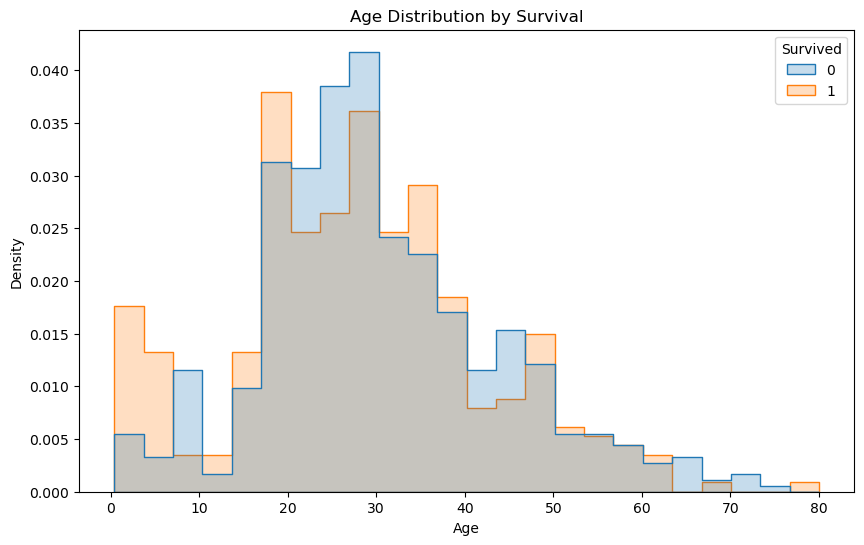


T-statistic: -2.3016878758159693, P-value: 0.021583202777133503


In [10]:

# Visualize the distribution of Age for Survived vs Non-Survived


plt.figure(figsize=(10, 6))
sn.histplot(data=df, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Perform a t-test to compare the ages of survived and not survived passengers
from scipy.stats import ttest_ind

survived_ages = df[df['Survived'] == 1]['Age']
not_survived_ages = df[df['Survived'] == 0]['Age']

t_stat, p_value = ttest_ind(survived_ages, not_survived_ages)

print(f"\nT-statistic: {t_stat}, P-value: {p_value}")


In [11]:
train=df #change back to train
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,35.645872,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


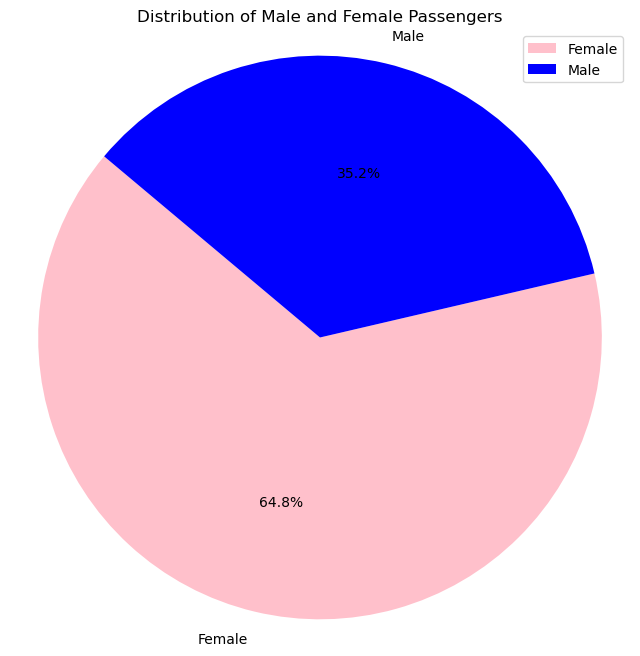

In [12]:
# visualising gender distribution of survivaa
# Calculate the distribution of male and female passengers
gender_counts = train['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=["Female", "Male"], autopct='%1.1f%%', startangle=140, colors=['pink','blue'])
plt.title('Distribution of Male and Female Passengers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

In [13]:
# with feature engineering create Family Size: SibSp + Parch
train["Family Size"]=train["SibSp"] + train["Parch"]

print(train.columns) #print columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family Size'],
      dtype='object')


In [14]:
# Apply Decision Tree to determine who survived

# Process numerical data
from sklearn.preprocessing import StandardScaler

numerical_columns = ["Age", "Fare"]
train[numerical_columns] = StandardScaler().fit_transform(train[numerical_columns])

# Encode string categorical data
from sklearn.preprocessing import LabelEncoder

train["Sex"] = LabelEncoder().fit_transform(train["Sex"])

# Columns to drop
columns_to_drop = ["PassengerId", "Name", "Embarked", "Survived", "Ticket"]
data = train.drop(columns_to_drop, axis=1)

A = train.drop(columns_to_drop, axis=1)  # Retain A with dropped columns for clarity

b = train["Survived"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, random_state=32, test_size=0.2)

# Train a  model with RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=4, min_samples_split=2)
model.fit(A_train, b_train)

# Evaluate the model
accuracy = model.score(A_test, b_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8324022346368715


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Read test data
test = pd.read_csv("test.csv")

# Drop unnecessary columns that exist in the DataFrame
columns_to_drop = ["Name", "Embarked", "Ticket", "Cabin"]
existing_columns = [col for col in columns_to_drop if col in test.columns]
test = test.drop(existing_columns, axis=1)

# Create 'Family Size' feature
test['Family Size'] = test['SibSp'] + test['Parch']

# Handle missing values in numerical columns ('Age' and 'Fare')
test_numerical_columns = ["Age", "Fare"]
imputer = SimpleImputer(strategy='mean')
test[test_numerical_columns] = imputer.fit_transform(test[test_numerical_columns])

# Encode string categorical data ('Sex')
test["Sex"] = LabelEncoder().fit_transform(test["Sex"])

# Ensure consistent columns with training data
test = test[A_train.columns]  # Use only columns present in A_train

# Make predictions
predictions = model.predict(test)

# Prepare output DataFrame
output = pd.DataFrame({'Survived': predictions})

# Optionally, add PassengerId back to the output DataFrame if needed
output['PassengerId'] = pd.read_csv("test.csv")['PassengerId']

# Save predictions to a CSV file
output.to_csv('model.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv
